In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import os
import numpy as np

train_dir = r'C:\Users\PC 30 - 316\Documents\PA Ulfa Damayanti\Dataset Daun Cabai\train'
target_per_class = 2300  # target maksimum per kelas

# Konfigurasi augmentasi
datagen = ImageDataGenerator(
    zoom_range=0.2,
    brightness_range=(0.8, 1.2),
    rescale=1./255,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Proses augmentasi per kelas
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    images = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    current_count = len(images)

    print(f"Kelas {class_name}: {current_count} gambar")

    if current_count >= target_per_class:
        print(f"  → Melewati, sudah mencapai atau melebihi {target_per_class}")
        continue

    needed = target_per_class - current_count
    print(f"  → Menambahkan {needed} gambar melalui augmentasi")

    i = 0
    while i < needed:
        img_name = images[i % len(images)]  # ambil gambar secara berulang
        img_path = os.path.join(class_path, img_name)

        img = load_img(img_path, target_size=(224, 224))
        x = img_to_array(img)
        x = np.expand_dims(x, axis=0)

        aug_iter = datagen.flow(
            x,
            batch_size=1,
            save_to_dir=class_path,
            save_prefix='aug',
            save_format='jpeg'
        )

        next(aug_iter)
        i += 1

print("Augmentasi selesai.")

Kelas Healthy Leaf: 550 gambar
  → Menambahkan 1750 gambar melalui augmentasi
Kelas Leaf Curl: 550 gambar
  → Menambahkan 1750 gambar melalui augmentasi
Kelas Spot Leaf: 550 gambar
  → Menambahkan 1750 gambar melalui augmentasi
Kelas Whitefly Leaf: 550 gambar
  → Menambahkan 1750 gambar melalui augmentasi
Kelas Yellowish Leaf: 550 gambar
  → Menambahkan 1750 gambar melalui augmentasi
Augmentasi selesai.


In [ ]:
import os
import shutil
import random
from tqdm import tqdm

original_train_dir = r'C:\Users\PC 30 - 316\Documents\PA Ulfa Damayanti\Dataset Daun Cabai\train'
base_dir = r'C:\Users\PC 30 - 316\Documents\PA Ulfa Damayanti\Dataset Daun Cabai'

all_data_dir = os.path.join(base_dir, 'all_data')
os.makedirs(all_data_dir, exist_ok=True)

for class_name in os.listdir(original_train_dir):
    src_class_path = os.path.join(original_train_dir, class_name)
    dst_class_path = os.path.join(all_data_dir, class_name)
    shutil.move(src_class_path, dst_class_path)

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')
for dir_path in [train_dir, val_dir, test_dir]:
    os.makedirs(dir_path, exist_ok=True)

for class_name in os.listdir(all_data_dir):
    class_path = os.path.join(all_data_dir, class_name)
    images = os.listdir(class_path)
    random.shuffle(images)

    n_total = len(images)
    n_train = int(0.8 * n_total)
    n_val = int(0.1 * n_total)
    n_test = n_total - n_train - n_val

    split_map = {
        train_dir: images[:n_train],
        val_dir: images[n_train:n_train + n_val],
        test_dir: images[n_train + n_val:]
    }

    for target_dir, image_list in split_map.items():
        class_target_path = os.path.join(target_dir, class_name)
        os.makedirs(class_target_path, exist_ok=True)
        for image_name in tqdm(image_list, desc=f"{class_name} → {os.path.basename(target_dir)}"):
            src = os.path.join(class_path, image_name)
            dst = os.path.join(class_target_path, image_name)
            shutil.copy2(src, dst)

Yellowish Leaf → test: 100%|████████████████████████████████████████████████████████| 216/216 [00:01<00:00, 142.70it/s]


Distribusi Kelas (Train):
  Healthy: 1720
  Leaf Curl: 1729
  Leaf Spot: 1738
  Whitefly: 1700
  Yellowish: 1721


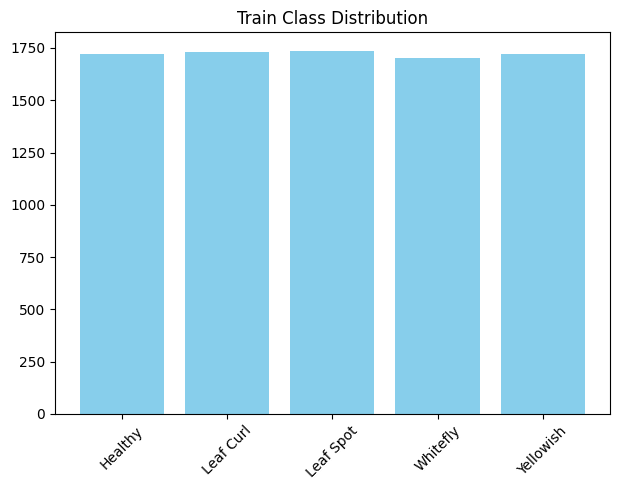

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt

# Path direktori
train_dir = r'C:\Users\PC 30 - 316\Documents\PA Ulfa Damayanti\Dataset Daun Cabai\train'
test_dir = r'C:\Users\PC 30 - 316\Documents\PA Ulfa Damayanti\Dataset Daun Cabai\test'

label_map = {
    'Healthy Leaf': 'Healthy',
    'Yellowish Leaf': 'Yellowish',
    'Leaf Curl': 'Leaf Curl',
    'Spot Leaf': 'Leaf Spot',
    'Whitefly Leaf': 'Whitefly'
}

def count_images_per_class(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            num_images = len([
                f for f in os.listdir(class_path)
                if f.lower().endswith(('.jpg', '.png', '.jpeg'))
            ])
            class_counts[class_name] = num_images
    return class_counts

train_counts = count_images_per_class(train_dir)



train_counts_named = {label_map[k]: v for k, v in train_counts.items()}


print("Distribusi Kelas (Train):")
for label, count in train_counts_named.items():
    print(f"  {label}: {count}")

# Plot bar chart
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.bar(train_counts_named.keys(), train_counts_named.values(), color='skyblue')
plt.title("Train Class Distribution")
plt.xticks(rotation=45)



plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path ke direktori
base_dir = r'C:\Users\PC 30 - 316\Documents\PA Ulfa Damayanti\Dataset Daun Cabai'
train_dir = base_dir + r'\train'
val_dir = base_dir + r'\val'
test_dir = base_dir + r'\test'

# Normalisasi gambar (tanpa augmentasi tambahan)
datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

# Load validation data
val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Load test data
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 8608 images belonging to 5 classes.
Found 1075 images belonging to 5 classes.
Found 1079 images belonging to 5 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path ke direktori
base_dir = r'C:\Users\PC 30 - 316\Documents\PA Ulfa Damayanti\Dataset Daun Cabai'
train_dir = base_dir + r'\train'
val_dir = base_dir + r'\val'
test_dir = base_dir + r'\test'

# Normalisasi gambar (tanpa augmentasi tambahan)
datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

# Load validation data
val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Load test data
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 8608 images belonging to 5 classes.
Found 1075 images belonging to 5 classes.
Found 1079 images belonging to 5 classes.


Build Model (VGG-16)

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras import regularizers

# Load VGG16 tanpa top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

for layer in base_model.layers:
    layer.trainable = False
for layer in base_model.layers[-15:]:
    layer.trainable = True

# Custom classifier dengan Batch Normalization
x = GlobalAveragePooling2D()(base_model.output)

x = Dense(128, activation='selu')(x)
x = Dropout(0.5)(x)

# x = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
# x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

# Bangun dan compile model
model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999), loss='categorical_crossentropy', metrics=['accuracy'])

# Cek arsitektur model
model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 48, 48, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 48, 48, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 48, 48, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,6

 Total params: 14,780,997 (56.39 MB)

 Trainable params: 14,742,277 (56.24 MB)

 Non-trainable params: 38,720 (151.25 KB)

Training Model

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

# ReduceLROnPlateau: mengurangi learning rate saat val_loss stagnan
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    min_lr=1e-6,
    verbose=1
)

# EarlyStopping: hentikan training jika val_loss tidak membaik
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=4,             # berhenti jika tidak ada perbaikan dalam 3 epoch
    restore_best_weights=True,  # kembali ke model dengan val_loss terbaik
    verbose=1
)

# Gabungkan semua callback
callbacks = [checkpoint, reduce_lr, early_stop]

# Training model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=callbacks
)




C:\Users\PC 30 - 316\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 521ms/step - accuracy: 0.4408 - loss: 1.2983
Epoch 1: val_loss improved from inf to 0.67049, saving model to best_model.keras
269/269 ━━━━━━━━━━━━━━━━━━━━ 152s 554ms/step - accuracy: 0.4413 - loss: 1.2971 - val_accuracy: 0.7312 - val_loss: 0.6705 - learning_rate: 1.0000e-04
Epoch 2/50
269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step - accuracy: 0.8092 - loss: 0.5195
Epoch 2: val_loss improved from 0.67049 to 0.29797, saving model to best_model.keras
269/269 ━━━━━━━━━━━━━━━━━━━━ 122s 453ms/step - accuracy: 0.8093 - loss: 0.5193 - val_accuracy: 0.8837 - val_loss: 0.2980 - learning_rate: 1.0000e-04
Epoch 3/50
269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.8931 - loss: 0.3121
Epoch 3: val_loss did not improve from 0.29797
269/269 ━━━━━━━━━━━━━━━━━━━━ 121s 449ms/step - accuracy: 0.8932 - loss: 0.3120 - val_accuracy: 0.8912 - val_loss: 0.3014 - learning_rate: 1.0000e-04
Epoch 4/50
269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.9261 - l

In [ ]:

loss, accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {accuracy:.4f}")

loss, acc = model.evaluate(test_generator)
print(f"Akurasi akhir di data test: {acc:.2f}")


34/34 ━━━━━━━━━━━━━━━━━━━━ 8s 238ms/step - accuracy: 0.9795 - loss: 0.0881
Test accuracy: 0.9898
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - accuracy: 0.9795 - loss: 0.0881
Akurasi akhir di data test: 0.99


Plot Training History

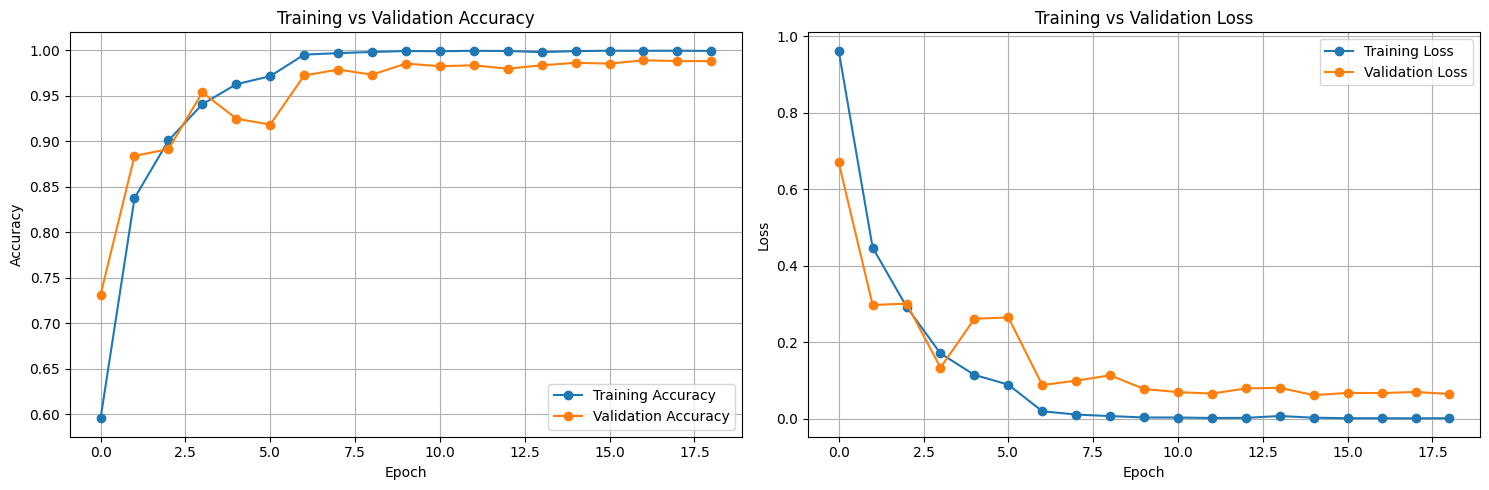

In [ ]:
import matplotlib.pyplot as plt

# Plot akurasi
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Confusion Matrix and Classification Report (Validation)

34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step


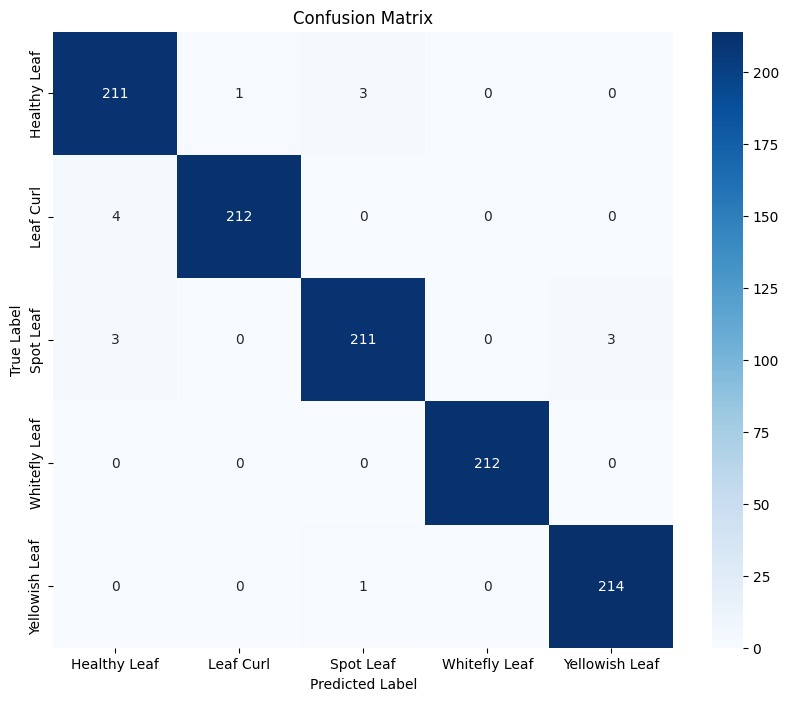


Classification Report:

                precision    recall  f1-score   support

  Healthy Leaf       0.97      0.98      0.97       215
     Leaf Curl       1.00      0.98      0.99       216
     Spot Leaf       0.98      0.97      0.98       217
 Whitefly Leaf       1.00      1.00      1.00       212
Yellowish Leaf       0.99      1.00      0.99       215

      accuracy                           0.99      1075
     macro avg       0.99      0.99      0.99      1075
  weighted avg       0.99      0.99      0.99      1075



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)


y_true = val_generator.classes


cm = confusion_matrix(y_true, y_pred)

class_names = list(val_generator.class_indices.keys())

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


Confusion Matrix and Classification Report (Testing)

34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step


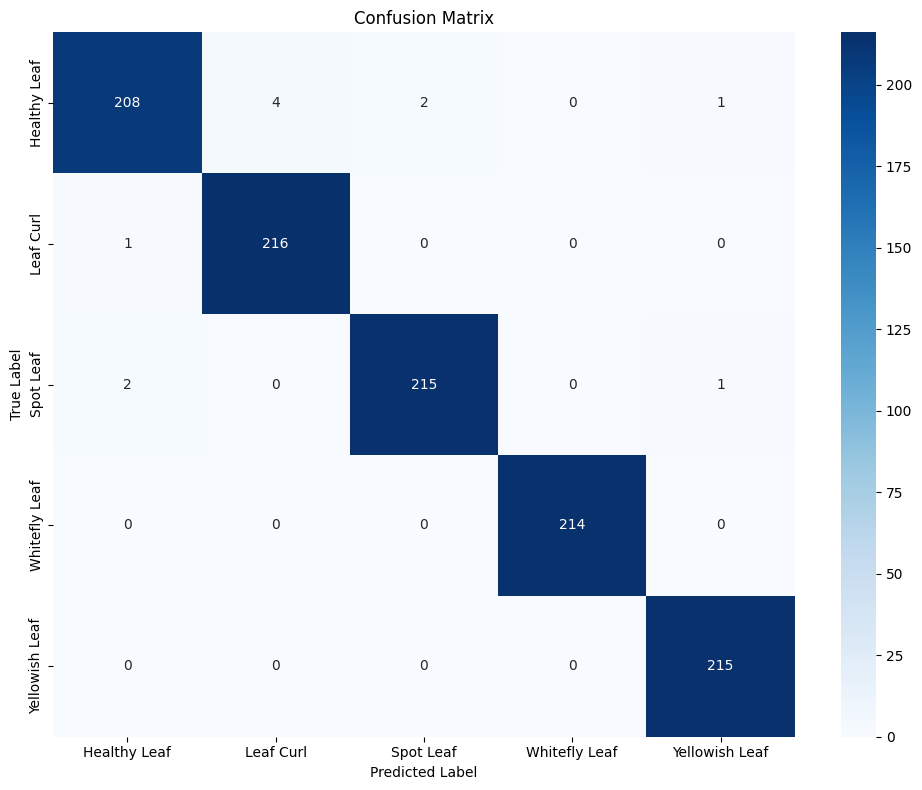


Classification Report:

                precision    recall  f1-score   support

  Healthy Leaf       0.99      0.97      0.98       215
     Leaf Curl       0.98      1.00      0.99       217
     Spot Leaf       0.99      0.99      0.99       218
 Whitefly Leaf       1.00      1.00      1.00       214
Yellowish Leaf       0.99      1.00      1.00       215

      accuracy                           0.99      1079
     macro avg       0.99      0.99      0.99      1079
  weighted avg       0.99      0.99      0.99      1079



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes

class_names = list(test_generator.class_indices.keys())

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


Save Model (TFlite)

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model("best_model.keras")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("modelvgg16.tflite", "wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\PC30-3~1\AppData\Local\Temp\tmpbd3na8cc\assets


INFO:tensorflow:Assets written to: C:\Users\PC30-3~1\AppData\Local\Temp\tmpbd3na8cc\assets
